In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import datasets, linear_model

In [2]:
#Load CSV data - BEWARE: this is the entire dataset
crimes = pd.read_csv('chicago-crimes.csv')

In [3]:
#crime count since 2001
crimes.ID.count()

6756885

In [4]:
#Analyzing data format
crimes.head(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"


In [7]:
#droping unnecessary columns
crimes.drop(columns=['ID','Case Number','Block','IUCR','FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location','Updated On','Ward'], inplace=True)
crimes.head(4)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
0,03/18/2015 07:44:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,25.0,2015
1,03/18/2015 11:00:00 PM,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,67.0,2015
2,03/18/2015 10:45:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,39.0,2015
3,03/18/2015 10:30:00 PM,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,40.0,2015


In [8]:
#Setting index for the data. This is done for timeseries analysis
date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(date)

In [9]:
#Drop date column since it is now the index (redundant column). Let's see the new format of the data
crimes.drop(columns=['Date'], inplace=True)
crimes.head(4)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
Date,,,,,,,,,
2015-03-18 19:44:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,25.0,2015
2015-03-18 23:00:00,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,67.0,2015
2015-03-18 22:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,39.0,2015
2015-03-18 22:30:00,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,40.0,2015


In [10]:
#here we can see the following:
# - Primary Type has 35 different values, the top (most common) one being THEFT
# - Description has 379 different values, the top being SIMPLE
# - Out of the 6 million crimes, 6756885 - 4883459 = 1,873,426 resulted in arrests
crimes.describe(include='all')

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
count,6756885,6756885,6752720,6756885,6756885,6.756885e+06,6.756838e+06,6.140856e+06,6.756885e+06
unique,35,379,179,2,2,NaN,NaN,NaN,NaN
top,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN
freq,1420411,797214,1772776,4883459,5870182,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.191865e+03,1.130306e+01,3.758136e+01,2.008333e+03
std,NaN,NaN,NaN,NaN,NaN,7.033942e+02,6.945608e+00,2.153190e+01,5.017390e+00
min,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,0.000000e+00,2.001000e+03
25%,NaN,NaN,NaN,NaN,NaN,6.220000e+02,6.000000e+00,2.300000e+01,2.004000e+03
50%,NaN,NaN,NaN,NaN,NaN,1.111000e+03,1.000000e+01,3.200000e+01,2.008000e+03
75%,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,5.700000e+01,2.012000e+03


In [11]:
#Top 8 crimes types overall
crimes['Primary Type'].value_counts().head(8)

THEFT                  1420411
BATTERY                1233999
CRIMINAL DAMAGE         772478
NARCOTICS               711369
OTHER OFFENSE           419218
ASSAULT                 419171
BURGLARY                388426
MOTOR VEHICLE THEFT     314588
Name: Primary Type, dtype: int64

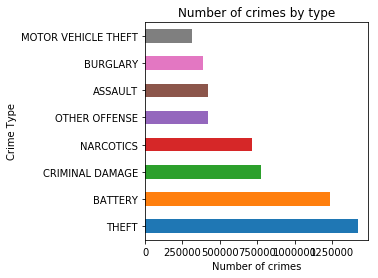

In [12]:
#Visualize data from before
plt.figure(figsize=(4,4))
crimes['Primary Type'].value_counts().head(8).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [13]:
#Top 8 crime location
crimes['Location Description'].value_counts().head(8)

STREET                            1772776
RESIDENCE                         1144179
APARTMENT                          698697
SIDEWALK                           666112
OTHER                              256803
PARKING LOT/GARAGE(NON.RESID.)     194063
ALLEY                              151041
SCHOOL, PUBLIC, BUILDING           142344
Name: Location Description, dtype: int64

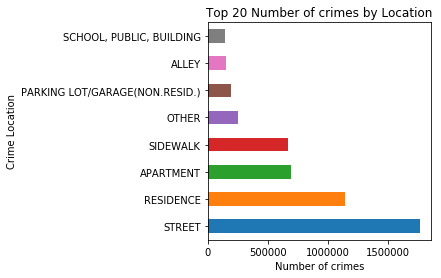

In [14]:
#Visualize data from before
plt.figure(figsize=(4,4))
crimes['Location Description'].value_counts().head(8).plot(kind='barh')
plt.title('Top 20 Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [15]:
#Top 8 crime descriptions
crimes['Description'].value_counts().head(8)

SIMPLE                          797214
$500 AND UNDER                  547798
DOMESTIC BATTERY SIMPLE         518140
TO VEHICLE                      375329
TO PROPERTY                     355361
OVER $500                       348980
POSS: CANNABIS 30GMS OR LESS    276648
FORCIBLE ENTRY                  263217
Name: Description, dtype: int64

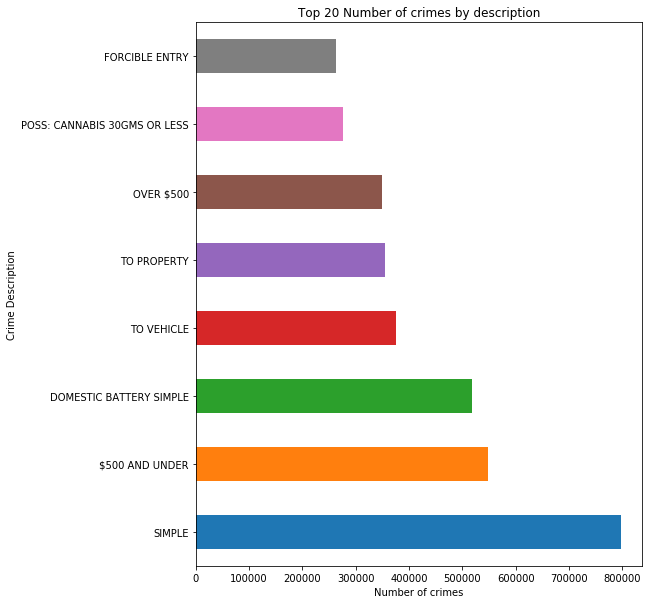

In [16]:
#Top 8 crime descriptions visualization
plt.figure(figsize=(8,10))
crimes['Description'].value_counts().head(8).plot(kind='barh')
plt.title('Top 20 Number of crimes by description')
plt.ylabel('Crime Description')
plt.xlabel('Number of crimes')
plt.show()

In [25]:
#Visualization of crimes by year.
#We exclude 2018 because data is not complete for this year
yearly_crimes = crimes.resample('Y').size()[:"2017"]
yearly_crimes.tail()

Date
2013-12-31    307039
2014-12-31    275212
2015-12-31    263943
2016-12-31    268827
2017-12-31    267823
Freq: A-DEC, dtype: int64

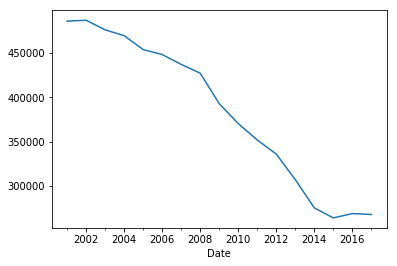

In [26]:
p = yearly_crimes.plot()

In [27]:
#Group crimes by month - excluding november 2018
monthly_crimes = crimes.resample('M').size()[:"2018-10"]
monthly_crimes.tail()

Date
2018-06-30    23943
2018-07-31    24904
2018-08-31    24978
2018-09-30    22596
2018-10-31    22294
Freq: M, dtype: int64

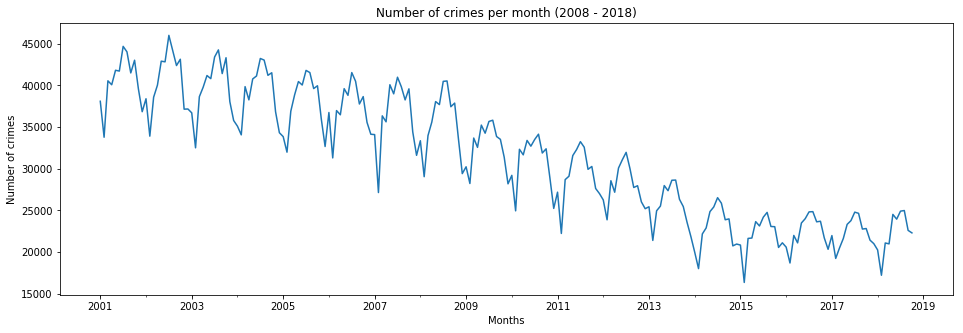

In [28]:
plt.figure(figsize=(16,5))
monthly_crimes.plot(legend=False)
plt.title('Number of crimes per month (2008 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [29]:
#Digging into the data, we notice that for every year, there's a surge of crimes during
#summer months - May to October, being July usually the one with most crime
monthly_crimes.head(24)

Date
2001-01-31    38098
2001-02-28    33779
2001-03-31    40553
2001-04-30    40080
2001-05-31    41821
2001-06-30    41724
2001-07-31    44691
2001-08-31    44032
2001-09-30    41502
2001-10-31    43028
2001-11-30    39596
2001-12-31    36846
2002-01-31    38400
2002-02-28    33909
2002-03-31    38584
2002-04-30    40035
2002-05-31    42913
2002-06-30    42834
2002-07-31    46013
2002-08-31    44210
2002-09-30    42388
2002-10-31    43145
2002-11-30    37151
2002-12-31    37171
Freq: M, dtype: int64

In [30]:
#Analyzing daily crimes
daily_crime = crimes.resample('D').size()

In [34]:
#Here we are analyzing the most violent day of each year
#For some reason, it seems to be January 1st for each year,
#except 2018 in whic it is May first.
topdays = [
    daily_crime['2001'].nlargest(1),
    daily_crime['2002'].nlargest(1),
    daily_crime['2003'].nlargest(1),
    daily_crime['2004'].nlargest(1),
    daily_crime['2005'].nlargest(1),
    daily_crime['2006'].nlargest(1),
    daily_crime['2007'].nlargest(1),
    daily_crime['2008'].nlargest(1),
    daily_crime['2009'].nlargest(1),
    daily_crime['2010'].nlargest(1),
    daily_crime['2011'].nlargest(1),
    daily_crime['2012'].nlargest(1),
    daily_crime['2013'].nlargest(1),
    daily_crime['2014'].nlargest(1),
    daily_crime['2015'].nlargest(1),
    daily_crime['2016'].nlargest(1),
    daily_crime['2017'].nlargest(1),
    daily_crime['2018'].nlargest(1)
]
described = []

for t in topdays:
    described.append([t.index[0], t[0]])
described

[[Timestamp('2001-01-01 00:00:00', freq='D'), 1815],
 [Timestamp('2002-01-01 00:00:00', freq='D'), 1854],
 [Timestamp('2003-01-01 00:00:00', freq='D'), 2023],
 [Timestamp('2004-01-01 00:00:00', freq='D'), 1890],
 [Timestamp('2005-01-01 00:00:00', freq='D'), 1961],
 [Timestamp('2006-01-01 00:00:00', freq='D'), 1901],
 [Timestamp('2007-01-01 00:00:00', freq='D'), 1946],
 [Timestamp('2008-01-01 00:00:00', freq='D'), 1801],
 [Timestamp('2009-01-01 00:00:00', freq='D'), 1818],
 [Timestamp('2010-01-01 00:00:00', freq='D'), 1421],
 [Timestamp('2011-01-01 00:00:00', freq='D'), 1531],
 [Timestamp('2012-01-01 00:00:00', freq='D'), 1494],
 [Timestamp('2013-01-01 00:00:00', freq='D'), 1358],
 [Timestamp('2014-01-01 00:00:00', freq='D'), 1148],
 [Timestamp('2015-01-01 00:00:00', freq='D'), 1160],
 [Timestamp('2016-01-01 00:00:00', freq='D'), 1052],
 [Timestamp('2017-01-01 00:00:00', freq='D'), 1101],
 [Timestamp('2018-05-01 00:00:00', freq='D'), 959]]

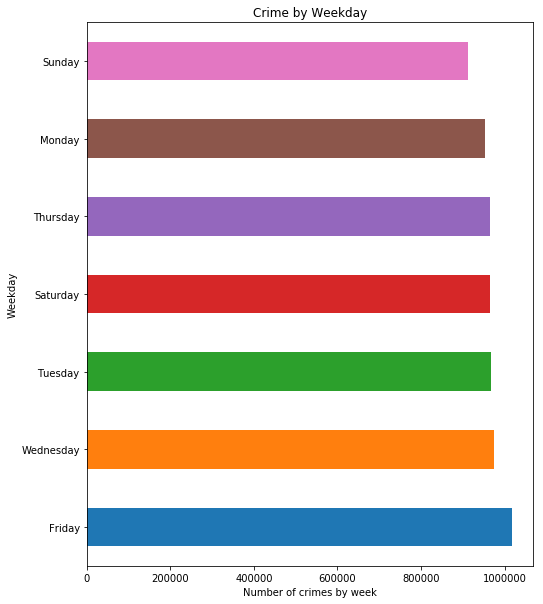

In [35]:
plt.figure(figsize=(8,10))
crimes.index.weekday_name.value_counts().sort_values(ascending=False).plot(kind='barh')
plt.title('Crime by Weekday')
plt.ylabel('Weekday')
plt.xlabel('Number of crimes by week')
plt.show()

In [52]:
#Now we'll try to predict the number of crimes for november 2018
#It should predict more than 17,000
november = crimes[crimes.index.month == 11].groupby('Year').size().head(-1)
november

Year
2001    39596
2002    37151
2003    38055
2004    36838
2005    35977
2006    35567
2007    34422
2008    33555
2009    31387
2010    28881
2011    27627
2012    26022
2013    23545
2014    20734
2015    20548
2016    21693
2017    21425
dtype: int64

In [68]:
#This uses linear regression to predict the following
#November 2018 will have 18,359 crimes (so far, chicago reports 17,000 for november 2018, not that far off!)
regr = linear_model.LinearRegression()

X = []
xx = november.index.tolist()
i = 0

for x in xx:
    X.append([i, x])

regr.fit(X, november)
regr.predict([[670, 2018]])

array([18359.52205882])